<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 5.4 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # we fix this value to index 42
print('%i regions found in this atlas' %
(len(np.unique(atlas_nii.get_data().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0] # gives subject age on standard units after z-scoring

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 861061120 of 905208634 bytes (95.1%,    0.7s remaining) ...done. (15 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/craddock_2012



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/64ec9dc239add5cb58c7248a4136b852/craddock_2011_parcellations.tar.gz..... done.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()


788 regions found in this atlas


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
X, y = input_variables, output_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
coefs = []

In [ ]:
n_iterations = 100
for i in range(n_iterations):
    X_train = resample(X_train, replace=True, n_samples=80) # X_train is the given bootstrap sample in the current iteration
    X_train = scaler.fit_transform(X_train) # Here we run the scaler on every iteration
    LR_boot = Lasso(max_iter=1e5, alpha=0.1).fit(X_train,y_train) # We fit the LR model to the current bootstrap sample  coefficients.append(LR_boot.coef_) # Store the coefficients in the "coefficients" array
    coefs.append(LR_boot.coef_)

In [ ]:
models = list(range(0,100))
len(models)
l_zeroes = []

for x in models:
    l = np.count_nonzero(coefs[x]==0)
    l_zeroes.append(l)

print(l_zeroes)

[768, 776, 777, 777, 780, 781, 780, 781, 784, 780, 781, 780, 784, 783, 785, 785, 783, 784, 785, 784, 785, 782, 783, 785, 784, 787, 787, 785, 786, 787, 788, 787, 787, 785, 784, 786, 787, 785, 785, 786, 785, 788, 785, 786, 785, 788, 784, 786, 787, 788, 785, 786, 785, 787, 785, 788, 787, 785, 787, 786, 785, 787, 786, 785, 788, 786, 785, 785, 787, 786, 788, 787, 788, 788, 788, 788, 788, 788, 788, 786, 788, 788, 787, 788, 788, 788, 788, 788, 786, 788, 788, 787, 788, 788, 787, 787, 788, 788, 788, 787]


In [ ]:
coefs = np.squeeze(coefs)
df = pd.DataFrame(coefs)
y = df[df == 0].count()
x = list(range(0,788))

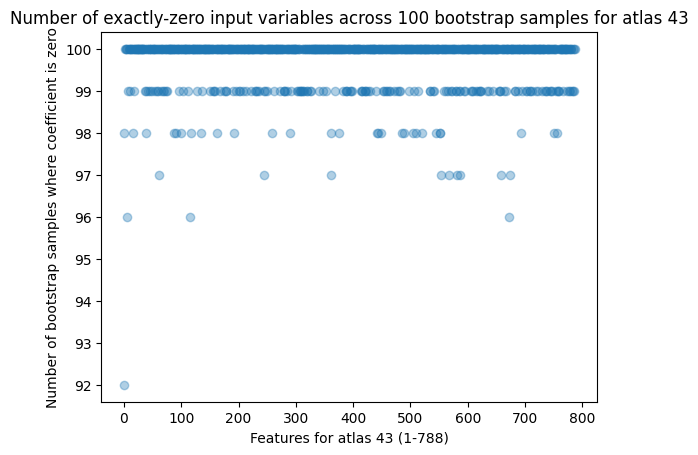

In [ ]:
plt.style.use("default")
plt.scatter(x,y,alpha=0.35)
plt.gca().set(
    title="Number of exactly-zero input variables across 100 bootstrap samples for atlas 43",
    xlabel="Features for atlas 43 (1-788)",
    ylabel="Number of bootstrap samples where coefficient is zero",
)
plt.show()

Unlike in exercise 4.4, this time a vast majority of input variables got zeroed out in all our bootstrap samples. It will be interesting to see the effect of noise on this data in the following exercise...